# Linear Regression

This part presents how a multiple linear regression can be used. The data used is the Housing Rent Dataset `housing_rent`. This dataset contains information collected by `Samprati Kothari` by scraping the cragigslist website, concerning the rent in different regions in US. 

source: https://www.kaggle.com/samprati97/housing-rent-dataset?select=housing_train.csv

### Main Question

How can we predict the rent prices in Birmingham using the `housing_rent` dataset? 

### Steps to create the regression line

#### Part 1: Pre-processing and EDA

1. Import the necessary libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

2. Import/Load the dataset

In [3]:
p = pd.read_csv('housing_train.csv')
p.head(10) #Displaying 10 rows. If you remove the numeric value it will display the default count of 5 rows.

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
5,7041966868,https://bham.craigslist.org/apa/d/birmingham-s...,birmingham,https://bham.craigslist.org,900,apartment,1298,2,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00606_g79izH5xxk...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
6,7041966702,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,925,apartment,1350,2,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00505_cAu36QXQV4...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
7,7041964186,https://bham.craigslist.org/apa/d/calera-st-av...,birmingham,https://bham.craigslist.org,1085,house,2308,3,2.0,1,...,0,0,0,w/d hookups,NaN,https://images.craigslist.org/00D0D_g4BE3jPMBr...,"This is a NEW and LARGE 3BR, 2BTH renovation i...",33.0969,-86.7601,al
8,7041960353,https://bham.craigslist.org/apa/d/birmingham-n...,birmingham,https://bham.craigslist.org,1269,apartment,1156,3,2.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00a0a_lTBiptw032...,Perfect Location and a Perfect Price!!! Come ...,33.4237,-86.8015,al
9,7041959413,https://bham.craigslist.org/apa/d/birmingham-a...,birmingham,https://bham.craigslist.org,799,apartment,703,1,1.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00707_9dHoTSYoQn...,HWY 31 and I-65 access for easy commute! Be Do...,33.4237,-86.8015,al


3. Do some EDA on the dataset

In [320]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [321]:
p.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [322]:
p.shape

(265190, 22)

4. Visualization of the dataset

<AxesSubplot:>

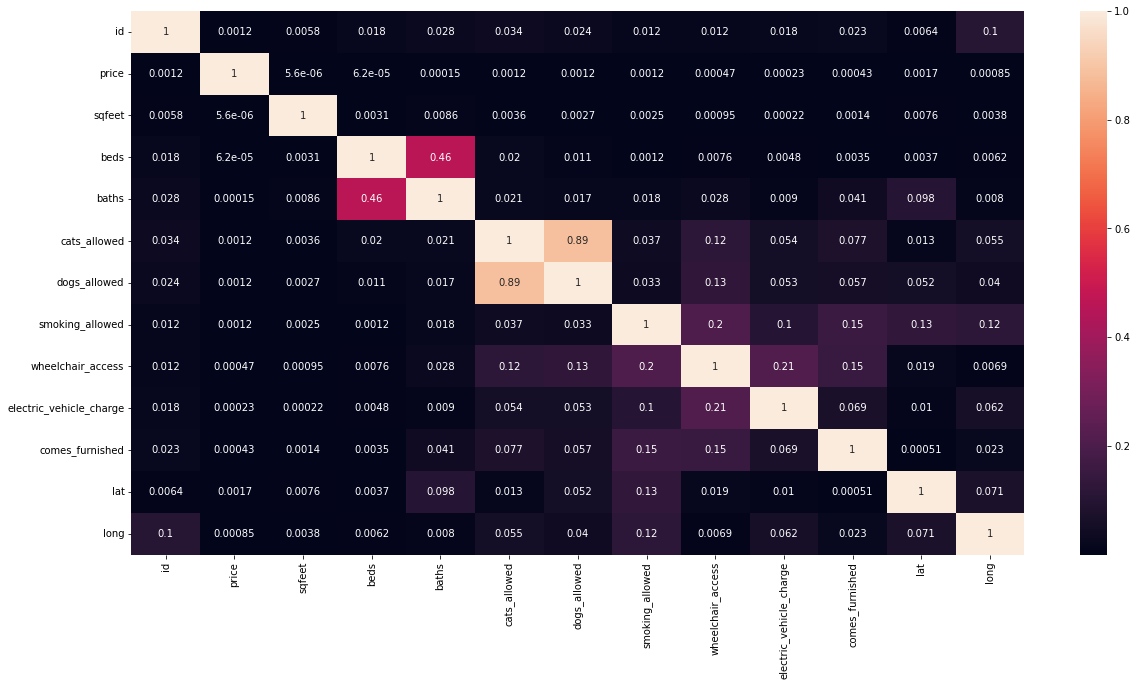

In [323]:
import seaborn as sns
from scipy import stats

plt.figure(figsize=(20, 10))
corr = p.corr()
sns.heatmap(corr.abs(), annot=True)

5. Cleaning of dataset, loading to dataframe and only getting the necessary variables for linear regression.

In [324]:
p['region'].value_counts()


jacksonville              4246
rochester                 3677
fayetteville              3652
omaha / council bluffs    2727
denver                    2671
                          ... 
corvallis/albany             3
kansas city                  3
northwest OK                 2
east oregon                  1
texoma                       1
Name: region, Length: 298, dtype: int64

In [325]:
p[['region','price','sqfeet','beds','baths']].head()

,region,price,sqfeet,beds,baths
0,birmingham,1195,1908,3,2.0
1,birmingham,1120,1319,3,2.0
2,birmingham,825,1133,1,1.5
3,birmingham,800,927,1,1.0
4,birmingham,785,1047,2,1.0


In [326]:
p2=p.loc[p['region']== 'birmingham']
p2

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,7040683096,https://bham.craigslist.org/apa/d/birmingham-t...,birmingham,https://bham.craigslist.org,835,house,1056,3,1.0,0,...,0,0,0,NaN,NaN,https://images.craigslist.org/00k0k_8A1NMZ7IcX...,If youâre looking to rent a home in the Brid...,33.6493,-86.7057,al
563,7040682556,https://bham.craigslist.org/apa/d/birmingham-t...,birmingham,https://bham.craigslist.org,925,house,1346,4,2.0,0,...,0,0,0,NaN,NaN,https://images.craigslist.org/00Y0Y_5gBcmkIiqI...,This house is a must see! 4 bedroom 2 bath hom...,33.6493,-86.7057,al
564,7035298962,https://bham.craigslist.org/apa/d/birmingham-s...,birmingham,https://bham.craigslist.org,715,apartment,906,1,1.0,1,...,0,0,0,laundry on site,NaN,https://images.craigslist.org/00d0d_1bQcPqmtfS...,The Benton offers a private serene setting tha...,33.3942,-86.8025,al
566,7040672454,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,960,apartment,1150,2,2.0,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_7mSGmnR9Pz...,Turtle LakeRENT: $960 - $1007 / MONTH SIZE: 11...,33.3813,-86.7046,al


In [327]:
p_2=p2[['region','price','sqfeet','beds','baths']].head(20)

In [328]:
p_2.shape

(20, 5)

#### Part 2: Linear Regression

1. Determining the value of X and y

In [329]:
X = p_2[['sqfeet']]
y = p_2 ['price']

In [330]:
X.values[:20] #Showing the values of the independent (X_insurance) variable

array([[1908],
       [1319],
       [1133],
       [ 927],
       [1047],
       [1298],
       [1350],
       [2308],
       [1156],
       [ 703],
       [1050],
       [1375],
       [1319],
       [ 672],
       [1100],
       [1285],
       [1100],
       [ 851],
       [ 851],
       [1908]], dtype=int64)

In [331]:
y.values[:20] #Showing the values of the dependent (y_insurance) variable

array([1195, 1120,  825,  800,  785,  900,  925, 1085, 1269,  799,  890,
       1355, 1120,  685, 1060, 1236, 1100,  870,  815, 1195], dtype=int64)

2. Creating an instance of the model and train it using the fit method

In [332]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

3. Preview of the model parameters

In [333]:
model.intercept_

648.3102818663422

In [334]:
model.coef_

array([0.28640691])

4. Data Prediction and Data Visualization

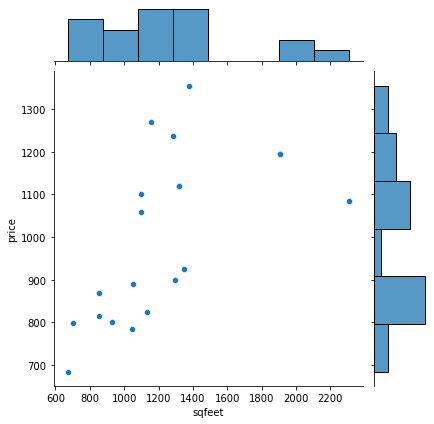

In [335]:
sns.jointplot(x=p_2.sqfeet, y=p_2.price)

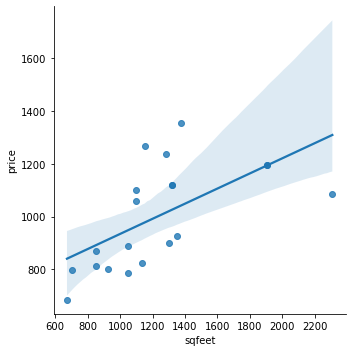

In [336]:
sns.lmplot(x='sqfeet', y='price', data=p_2)

In [337]:
pd = np.array([[2000], [1720]])
pd

array([[2000],
       [1720]])

In [338]:
model.predict(pd)

array([1221.12409879, 1140.93016442])

# Multivariable Linear Regression

This part presents how a multiple linear regression can be used. The data used is the Housing Rent Dataset `housing_rent`. This dataset contains information collected by `Samprati Kothari` by scraping the cragigslist website, concerning the rent in different regions in US. 

source: https://www.kaggle.com/samprati97/housing-rent-dataset?select=housing_train.csv

### Main Question

How can we predict the rent prices in Birmingham using the `housing_rent` dataset? 

1. In this part, the necessary libraries has been imported and the dataset has been converted into dataframe. We will also follow the steps in creating a regression line.

In [339]:
p_2.head()

,region,price,sqfeet,beds,baths
0,birmingham,1195,1908,3,2.0
1,birmingham,1120,1319,3,2.0
2,birmingham,825,1133,1,1.5
3,birmingham,800,927,1,1.0
4,birmingham,785,1047,2,1.0


2. Do some EDA on the dataset

In [340]:
p_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  20 non-null     object 
 1   price   20 non-null     int64  
 2   sqfeet  20 non-null     int64  
 3   beds    20 non-null     int64  
 4   baths   20 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB


In [341]:
p_2.describe(include="all")

,region,price,sqfeet,beds,baths
count,20,20.00000,20.000000,20.000000,20.000000
unique,1,NaN,NaN,NaN,NaN
top,birmingham,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN
mean,NaN,1001.45000,1233.000000,2.100000,1.675000
std,NaN,193.99416,411.860094,0.788069,0.466651
min,NaN,685.00000,672.000000,1.000000,1.000000
25%,NaN,822.50000,1017.000000,1.750000,1.000000
50%,NaN,992.50000,1144.500000,2.000000,2.000000
75%,NaN,1138.75000,1326.750000,3.000000,2.000000


3. Defining the X and y variables

In [342]:
X = p_2[['sqfeet', 'beds', 'baths']]
y = p_2['price']

In [343]:
X.values[:20] #Showing the values of the independent (X_insurance) variable

array([[1.908e+03, 3.000e+00, 2.000e+00],
       [1.319e+03, 3.000e+00, 2.000e+00],
       [1.133e+03, 1.000e+00, 1.500e+00],
       [9.270e+02, 1.000e+00, 1.000e+00],
       [1.047e+03, 2.000e+00, 1.000e+00],
       [1.298e+03, 2.000e+00, 2.000e+00],
       [1.350e+03, 2.000e+00, 2.000e+00],
       [2.308e+03, 3.000e+00, 2.000e+00],
       [1.156e+03, 3.000e+00, 2.000e+00],
       [7.030e+02, 1.000e+00, 1.000e+00],
       [1.050e+03, 2.000e+00, 2.000e+00],
       [1.375e+03, 3.000e+00, 2.000e+00],
       [1.319e+03, 3.000e+00, 2.000e+00],
       [6.720e+02, 2.000e+00, 1.000e+00],
       [1.100e+03, 2.000e+00, 2.000e+00],
       [1.285e+03, 2.000e+00, 2.000e+00],
       [1.100e+03, 2.000e+00, 2.000e+00],
       [8.510e+02, 1.000e+00, 1.000e+00],
       [8.510e+02, 1.000e+00, 1.000e+00],
       [1.908e+03, 3.000e+00, 2.000e+00]])

In [344]:
y.values[:20] #Showing the values of the dependent (y_insurance) variable

array([1195, 1120,  825,  800,  785,  900,  925, 1085, 1269,  799,  890,
       1355, 1120,  685, 1060, 1236, 1100,  870,  815, 1195], dtype=int64)

4. Accessing the coefficients.

In [345]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [346]:
model.intercept_

455.7094174641345

In [347]:
model.coef_

array([2.01771894e-03, 1.02558520e+02, 1.95749160e+02])

5. Training the model

In [348]:
predict_data = np.array([[2000, 3, 2], [1200, 2, 1]])

In [349]:
predict_data

array([[2000,    3,    2],
       [1200,    2,    1]])

6. We can see that the first one should cost USD 1158.91, while the second - USD 858.99. The predicted result is very much close to the actual data.

In [350]:
model.predict(predict_data)

array([1158.91873542,  858.99688021])

# Polynomial regression

1. The necessary libraries have been imported at this point except for the class responsible for data transformation into a polynomial form so we have to import it. We will also follow the steps in creating a regression line.

In [351]:
from sklearn.preprocessing import PolynomialFeatures

2. We load the data and define X and y.

In [352]:
X = p_2[['sqfeet']]
y = p_2['price']

In [353]:
X.values #Showing the values of the independent (X_insurance) variable

array([[1908],
       [1319],
       [1133],
       [ 927],
       [1047],
       [1298],
       [1350],
       [2308],
       [1156],
       [ 703],
       [1050],
       [1375],
       [1319],
       [ 672],
       [1100],
       [1285],
       [1100],
       [ 851],
       [ 851],
       [1908]], dtype=int64)

In [354]:
y.values #Showing the values of the dependent (y_insurance) variable

array([1195, 1120,  825,  800,  785,  900,  925, 1085, 1269,  799,  890,
       1355, 1120,  685, 1060, 1236, 1100,  870,  815, 1195], dtype=int64)

3. Transforming the input with fit_transform command.

In [355]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [356]:
X_poly[:5]

array([[1.00000000e+00, 1.90800000e+03, 3.64046400e+06, 6.94600531e+09],
       [1.00000000e+00, 1.31900000e+03, 1.73976100e+06, 2.29474476e+09],
       [1.00000000e+00, 1.13300000e+03, 1.28368900e+06, 1.45441964e+09],
       [1.00000000e+00, 9.27000000e+02, 8.59329000e+05, 7.96597983e+08],
       [1.00000000e+00, 1.04700000e+03, 1.09620900e+06, 1.14773082e+09]])

4. Passing the data to the model, we use the result of the transformation.

In [358]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [43]:
model.intercept_

273.2176041606558

In [44]:
model.coef_

array([ 0.00000000e+00,  5.24447838e-01,  2.87844726e-04, -1.58454213e-07])

5. Transforming first the input data with the transform method.

In [359]:
predict_data = np.array([[2000], [1500]])

In [360]:
predict_data

array([[2000],
       [1500]])

In [361]:
predict_data_poly = poly.transform(predict_data)

In [362]:
predict_data_poly

array([[1.000e+00, 2.000e+03, 4.000e+06, 8.000e+09],
       [1.000e+00, 1.500e+03, 2.250e+06, 3.375e+09]])

6. Finally, we make predictions, providing the appropriate data.


In [363]:
model.predict(predict_data_poly)

array([1205.85847785, 1172.75702502])

# Decision Tree

Importing the necessary libraries and data loading into the dataframe.

In [364]:
from sklearn.tree import DecisionTreeRegressor

Creating the variables X and y.

In [365]:
X = p_2[['sqfeet', 'beds','baths']]
y= p_2['price']

Creating an instance of the model and train it using the fit method.

In [366]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

Data prediction. Finally, we can find out how much they should cost.

In [367]:
pred = np.array([[1500, 2 , 2]])
pred

array([[1500,    2,    2]])

In [368]:
model.predict(pred)

array([925.])

# Model Evaluation

### Training and test set

To split the data set, we use the train_test_split function from the scikit-learn package.

In [369]:
from sklearn.model_selection import train_test_split

In [370]:
p_2

,region,price,sqfeet,beds,baths
0,birmingham,1195,1908,3,2.0
1,birmingham,1120,1319,3,2.0
2,birmingham,825,1133,1,1.5
3,birmingham,800,927,1,1.0
4,birmingham,785,1047,2,1.0
5,birmingham,900,1298,2,2.0
6,birmingham,925,1350,2,2.0
7,birmingham,1085,2308,3,2.0
8,birmingham,1269,1156,3,2.0
9,birmingham,799,703,1,1.0


In [371]:
X = p_2[['sqfeet', 'beds', 'baths']]
y = p_2['price']

In [372]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [373]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20, 3) (20,)
(16, 3) (16,)
(4, 3) (4,)


### Validation set

Finally, we can see that the training set contains 27 samples, and the validation and test sets - 10 each.

In [374]:
p_2

,region,price,sqfeet,beds,baths
0,birmingham,1195,1908,3,2.0
1,birmingham,1120,1319,3,2.0
2,birmingham,825,1133,1,1.5
3,birmingham,800,927,1,1.0
4,birmingham,785,1047,2,1.0
5,birmingham,900,1298,2,2.0
6,birmingham,925,1350,2,2.0
7,birmingham,1085,2308,3,2.0
8,birmingham,1269,1156,3,2.0
9,birmingham,799,703,1,1.0


In [375]:
X = p_2[['sqfeet', 'beds', 'baths']]
y = p_2['price']

In [376]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [377]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(20, 3) (20,)
(12, 3) (12,)
(4, 3) (4,)
(4, 3) (4,)


### CROSS VALIDATION = k-fold cross-validation

In [378]:
from sklearn.model_selection import KFold

In [379]:
X = p_2[['sqfeet', 'beds', 'baths']]
y = p_2['price']

In [380]:
cross = KFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cross.split(X,y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]
    print(X_train.shape, X_test.shape)

(16, 3) (4, 3)
(16, 3) (4, 3)
(16, 3) (4, 3)
(16, 3) (4, 3)
(16, 3) (4, 3)


### CROSS VALIDATION = k-fold leave-one-out cross-validation

In [381]:
from sklearn.model_selection import LeaveOneOut

In [382]:
X = p_2[['sqfeet', 'beds', 'baths']]
y = p_2['price']

In [383]:
cross = LeaveOneOut()
for train, test in cross.split(X,y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]
    print(X_train.shape, X_test.shape)

(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)
(19, 3) (1, 3)


### R2 Factor in scikit-learn

In [384]:
from sklearn.metrics import r2_score

In [385]:
X = p_2[['sqfeet', 'beds', 'baths']]
y = p_2['price']

In [386]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [387]:
y_predict = model.predict(X)

In [388]:
r2_score(y, y_predict)

0.6896766185427139

### Evaluation of the effectiveness of the regression models

In [480]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

##### Linear regression

In [481]:
X = p_2[['sqfeet']]
y = p_2 ['price']

In [482]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [483]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [484]:
y_p1 = model.predict(X_test)

In [485]:
mean_absolute_error(y_test, y_p1)

97.39363151322706

In [486]:
mean_absolute_percentage_error(y_test, y_p1)

0.0821166434208538

In [487]:
mean_squared_error(y_test, y_p1)

17728.21818013442

In [488]:
mean_squared_error(y_test, y_p1, squared=False)

133.1473551375859

##### Multivariable regression

In [489]:
X = p_2[['sqfeet', 'beds', 'baths']]
y = p_2['price']

In [490]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [491]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [492]:
y_p2 = model.predict(X_test)

In [493]:
mean_absolute_error(y_test, y_p2)

110.89838858591577

In [494]:
mean_absolute_percentage_error(y_test, y_p2)

0.10327110348338839

In [495]:
mean_squared_error(y_test, y_p2)

17296.848191484332

In [496]:
mean_squared_error(y_test, y_p2, squared=False)

131.5174824556961

##### Polynomial regression

In [497]:
X = p_2[['sqfeet']]
y = p_2['price']

In [498]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [499]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [500]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [501]:
predict_data_poly = poly.transform(X_test)

In [502]:
y_p3 = model.predict(predict_data_poly)

In [503]:
mean_absolute_error(y_test, y_p3)

58.36304049065842

In [504]:
mean_absolute_percentage_error(y_test, y_p3)

0.05115083066464982

In [505]:
mean_squared_error(y_test, y_p3)

6252.693494148982

In [506]:
mean_squared_error(y_test, y_p3, squared=False)

79.07397482199173

##### Decision Tree

In [507]:
X = p_2[['sqfeet', 'beds','baths']]
y= p_2['price']

In [508]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [509]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [510]:
y_p4 = model.predict(X_test)

In [511]:
mean_absolute_error(y_test, y_p4)

97.75

In [512]:
mean_absolute_percentage_error(y_test, y_p4)

0.0837657627496931

In [513]:
mean_squared_error(y_test, y_p4)

28980.25

In [514]:
mean_squared_error(y_test, y_p4, squared=False)

170.23586578626725

<!DOCTYPE html>
<html>
<style>
table, th, td {
  border:1px solid black;
}
</style>
<body>

<h2>Comparison of different Models</h2>

<table style="width:100%">
  <tr>
    <th></th>
    <th>Linear</th>
    <th>MultiVar</th>
    <th>Poly</th>
    <th>Decision Tree</th>
  </tr>
  <tr><b>
    <b><td>MAE</td></b>
    <td>97.39363151322706</td>
    <td>110.89838858591577</td>
    <td>58.36304049065842</td>
    <td>97.75</td>
  </tr>
  <tr>
    <b><td>MSE</td></b>
    <td>17728.21818013442</td>
    <td>17296.848191484332</td>
    <td>6252.693494148982</td>
    <td>28980.25</td>
  </tr>
    <tr>
    <b><td>RMSE</td></b>
    <td>133.1473551375859</td>
    <td>131.5174824556961</td>
    <td>79.07397482199173</td>
    <td>170.23586578626725</td>
  </tr>
</table>



</body>
</html>


### Conclusion

Based on the computed R-squared, the linear regression generated in this project explains about 68.97% of the variability.